# 🏠 Housing Market Analysis Project

This project utilizes **Python** and **Pandas** to analyze housing market data. The dataset includes information about dates, areas, average prices, codes, houses sold, and crime rates. The goal is to clean the data, manipulate time-series features, and derive insights regarding price trends and crime statistics across different areas (e.g., England, London).

### 🎯 Project Objectives
* **Data Inspection & Cleaning:** Detecting missing values and visualizing them using **Seaborn** heatmaps.
* **Data Transformation:** Converting string dates to datetime objects and extracting specific time features (Year).
* **Statistical Analysis:** Calculating min, max, and mean values for prices and crime rates.
* **Filtering & Aggregation:** Analyzing specific regions (e.g., 'England') and price ranges (e.g., < 100k).

### 🛠️ Key Techniques
* **Time Series Manipulation:** `to_datetime()`, `dt.year`.
* **Data Visualization:** `sns.heatmap()`.
* **Aggregation:** `groupby()`, `min()`, `max()`, `mean()`.
* **Conditional Selection:** Filtering data based on specific criteria (Area, Price).

## 1. Importing Libraries and Loading the Dataset
Loading the housing dataset and displaying the first few rows to understand the structure.

In [25]:
import pandas as pd
df=pd.read_csv("london_housing.csv")
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


## 2. Data Inspection

In [26]:
df.count() #Checking non-null values in each column to identify potential missing data.

date             13549
area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
dtype: int64

In [27]:
df.isnull().sum() #Detecting Null Values

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

## 3. Visualization: Null Value Heatmap
Using Seaborn to visually represent the distribution of missing data (especially in 'no_of_crimes').

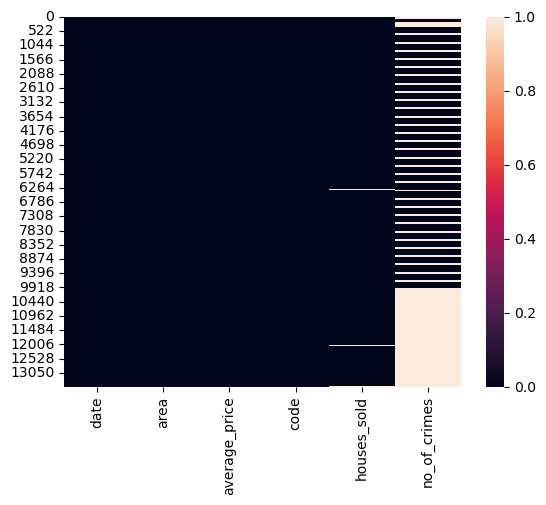

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())
plt.show()

## 4. Data Transformation: Date Conversion
Converting the 'date' column from object (string) format to standard datetime format for analysis.

In [29]:
df.dtypes

date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
dtype: object

In [30]:
df.date=pd.to_datetime(df.date)

In [31]:
df.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
dtype: object

In [32]:
df.date

0       1995-01-01
1       1995-02-01
2       1995-03-01
3       1995-04-01
4       1995-05-01
           ...    
13544   2019-09-01
13545   2019-10-01
13546   2019-11-01
13547   2019-12-01
13548   2020-01-01
Name: date, Length: 13549, dtype: datetime64[ns]


## 5. Extracting the Year
Creating a new 'year' column by extracting the year component from the date.


In [33]:
df['year'] = df['date'].dt.year  

df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995


## 6. Data Manipulation: Column Operations

In [34]:
#df.insert(index,"new column name" ,new column values")
df.insert( 1 ,"month" ,df["date"].dt.month) #Adding Columns (Month)

df.head()

,date,month,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,2,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,3,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,4,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,5,city of london,84409,E09000001,10.0,NaN,1995


In [35]:
df.drop(["month"] , axis=1 ,inplace=True) #removing column
df.head() 
 

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995


## 7. Analysis: Zero Crime Rates


In [36]:
len(df[df["no_of_crimes"]== 0]) #Counting how many records have exactly 0 reported crimes.

104

In [37]:
(df["no_of_crimes"] == 0).sum()

np.int64(104)

## 8. Specific Analysis: Focusing on 'England'
Filtering the dataset to analyze records specifically for the area 'England'.

In [38]:
df[df["area"] == "england"] 

,date,area,average_price,code,houses_sold,no_of_crimes,year
13248,1995-01-01,england,53203,E92000001,47639.0,NaN,1995
13249,1995-02-01,england,53096,E92000001,47880.0,NaN,1995
13250,1995-03-01,england,53201,E92000001,67025.0,NaN,1995
13251,1995-04-01,england,53591,E92000001,56925.0,NaN,1995
13252,1995-05-01,england,53678,E92000001,64192.0,NaN,1995
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,2019
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,2019
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,2019
13547,2019-12-01,england,250410,E92000001,NaN,NaN,2019


In [39]:
df[df["area"] == "england"]["average_price"].min() 


52333

In [40]:
df[df["area"] == "england"]["average_price"].max()


250410

## 9. Aggregation: Price Trends in England
Grouping the England data by year to find the minimum average price for each year.

In [41]:
df1 = df[df["area"] == "england"].copy()


In [42]:
df1.groupby("year")["average_price"].min()

year
1995     52788
1996     52333
1997     55789
1998     61659
1999     65522
2000     75219
2001     84245
2002     96215
2003    121610
2004    139719
2005    158572
2006    166544
2007    181824
2008    165795
2009    159340
2010    174458
2011    173046
2012    174161
2013    176816
2014    188265
2015    202856
2016    220361
2017    231593
2018    240428
2019    243281
2020    247355
Name: average_price, dtype: int64

## 10. Group Analysis: Crime Statistics by Area
Calculating the maximum and average number of crimes reported for each area.

In [43]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995


In [44]:
df.groupby("area")["no_of_crimes"].max()

area
barking and dagenham      2049.0
barnet                    2893.0
bexley                    1914.0
brent                     2937.0
bromley                   2637.0
camden                    4558.0
city of london              10.0
croydon                   3263.0
ealing                    3401.0
east midlands                NaN
east of england              NaN
enfield                   2798.0
england                      NaN
greenwich                 2853.0
hackney                   3466.0
hammersmith and fulham    2645.0
haringey                  3199.0
harrow                    1763.0
havering                  1956.0
hillingdon                2819.0
hounslow                  2817.0
inner london                 NaN
islington                 3384.0
kensington and chelsea    2778.0
kingston upon thames      1379.0
lambeth                   4701.0
lewisham                  2813.0
london                       NaN
merton                    1623.0
newham                    3668.0
north

In [45]:
df.groupby("area")["no_of_crimes"].mean()

area
barking and dagenham      1599.275109
barnet                    2278.441048
bexley                    1299.458515
brent                     2415.602620
bromley                   2020.131004
camden                    3056.572052
city of london               0.423423
croydon                   2652.943231
ealing                    2607.061135
east midlands                     NaN
east of england                   NaN
enfield                   2077.921397
england                           NaN
greenwich                 2154.899563
hackney                   2575.751092
hammersmith and fulham    1914.676856
haringey                  2406.427948
harrow                    1256.598253
havering                  1530.358079
hillingdon                2141.768559
hounslow                  2040.231441
inner london                      NaN
islington                 2515.991266
kensington and chelsea    1833.222707
kingston upon thames       991.790393
lambeth                   3141.720524
lewisha

## 11. Analysis: Affordable Housing (< 100k)
Filtering and counting instances where the average house price is less than 100,000.

In [46]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995


In [47]:
df[df["average_price"] < 100000]

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995
...,...,...,...,...,...,...,...
13330,2001-11-01,england,95083,E92000001,109149.0,NaN,2001
13331,2001-12-01,england,95992,E92000001,93329.0,NaN,2001
13332,2002-01-01,england,96215,E92000001,71678.0,NaN,2002
13333,2002-02-01,england,96676,E92000001,77131.0,NaN,2002


In [48]:
df[df["average_price"] < 100000]["area"].value_counts()

area
north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
sutton                   54
enfield                  54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
hounslow                 41
lambeth                  41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
ealing                   31
inner london             31
harrow                   30
kingston upon t